# Assignment 2

### 1. Model construction

#### 1.1 Packages

In [298]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

#### 1.2 Data

In [165]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        result[i, sequence] = 1
    return result

x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

x_val = x_train[:10000]
partial_x_train = x_train[10000:] 
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### 1.2. Based Model
- 16 nodes
- 3 layers
- Relu activation function

In [166]:
based_model = keras.Sequential([
   layers.Dense(16, activation='relu'),
   layers.Dense(16, activation='relu'),
   layers.Dense(1, activation='sigmoid')
])

based_model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

based_model_history = based_model.fit(partial_x_train, 
                              partial_y_train, 
                              epochs=20,
                              batch_size=512, 
                              validation_data=(x_val, y_val))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.6832 - loss: 0.6084 - val_accuracy: 0.8203 - val_loss: 0.4396
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8832 - loss: 0.3628 - val_accuracy: 0.8674 - val_loss: 0.3413
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9154 - loss: 0.2619 - val_accuracy: 0.8820 - val_loss: 0.2973
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9340 - loss: 0.2056 - val_accuracy: 0.8878 - val_loss: 0.2785
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9456 - loss: 0.1702 - val_accuracy: 0.8893 - val_loss: 0.2749
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9571 - loss: 0.1407 - val_accuracy: 0.8856 - val_loss: 0.2799
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9626 - loss: 0.1228 - val_accuracy: 0.8848 - val_loss: 0.2923
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9706 - loss: 0.1021 - val_accuracy: 0.8847 - v

In [148]:
based_model_history_dict = based_model_history.history
based_model_history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

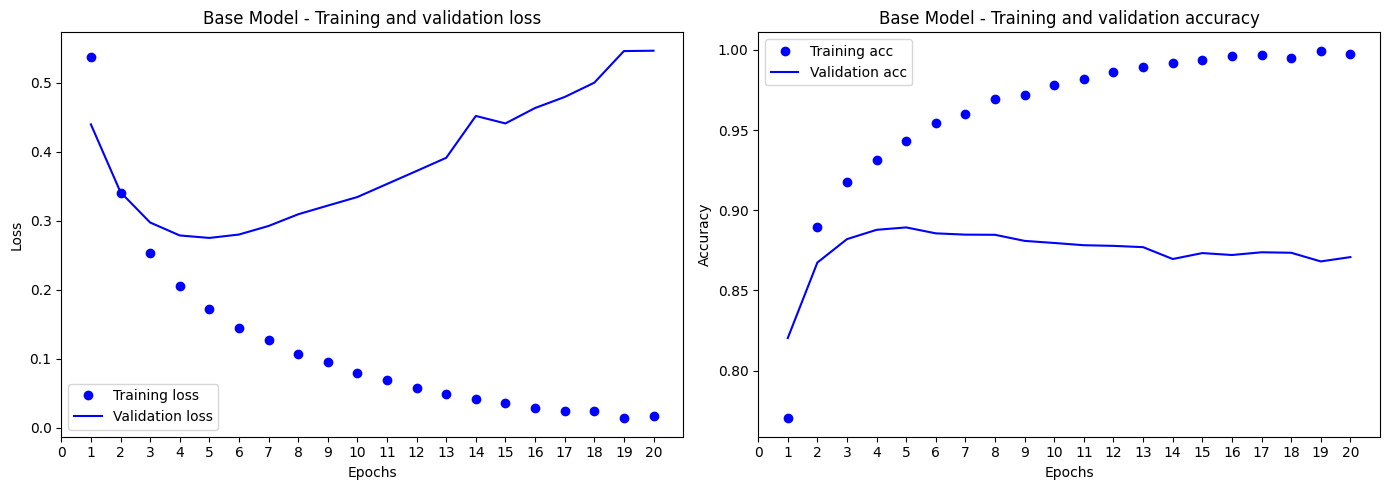

In [175]:
# Plot
based_model_history_dict = based_model_history.history
based_model_loss_values = based_model_history_dict["loss"]
based_model_val_loss_values = based_model_history_dict["val_loss"]
based_model_epochs = range(1, len(based_model_loss_values) + 1)
modified_model_1_acc = based_model_history_dict["accuracy"]
modified_model_1_val_acc = based_model_history_dict["val_accuracy"]

# Create a figure with 1 row and 2 columns for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot for Loss
ax1.plot(based_model_epochs, based_model_loss_values, "bo", label="Training loss")
ax1.plot(based_model_epochs, based_model_val_loss_values, "b", label="Validation loss")
ax1.set_title("Base Model - Training and validation loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_xlim([0, 21])
ax1.set_xticks(range(0, 21, 1))
ax1.legend()

# Plot for Accuracy
ax2.plot(based_model_epochs, modified_model_1_acc, "bo", label="Training acc")
ax2.plot(based_model_epochs, modified_model_1_val_acc, "b", label="Validation acc")
ax2.set_title("Base Model - Training and validation accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.set_xlim([0, 21])
ax2.set_xticks(range(0, 21, 1))
ax2.legend()

# Show the combined figure
plt.tight_layout()
plt.show()

Based model Retrain 1
- after the forth epoch, the model start to overfitting
- Retrain with epoch = 4

In [342]:
based_model_R1 = keras.Sequential([
   layers.Dense(16, activation='relu'),
   layers.Dense(16, activation='relu'),
   layers.Dense(1, activation='sigmoid')
])

based_model_R1.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

based_model_R1_epoch = 5

based_model_R1.fit(partial_x_train, 
                              partial_y_train, 
                              epochs=based_model_R1_epoch,
                              batch_size=512, 
                              validation_data=(x_val, y_val))

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.6836 - loss: 0.6036 - val_accuracy: 0.8725 - val_loss: 0.3837
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8984 - loss: 0.3331 - val_accuracy: 0.8856 - val_loss: 0.3043
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9259 - loss: 0.2392 - val_accuracy: 0.8883 - val_loss: 0.2803
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9429 - loss: 0.1855 - val_accuracy: 0.8897 - val_loss: 0.2768
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9494 - loss: 0.1562 - val_accuracy: 0.8887 - val_loss: 0.2781


In [343]:
Retrain_model_R1_results = based_model_R1.evaluate(x_test, y_test)
print("Retrained Base Model - Test Accuracy: ", round(Retrain_model_R1_results[1],4))
print("Retrained Base Model - Test Loss Value: ", round(Retrain_model_R1_results[0],4))

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8778 - loss: 0.2969
Retrained Base Model - Test Accuracy:  0.8804
Retrained Base Model - Test Loss Value:  0.2953


### 3. Q1: More vs Less hidden layers

#### 3.1. Modified Model 1
- 16 nodes
- 1 huiden layers
- Relu Activation function

In [249]:
modified_model_1 = keras.Sequential([
   layers.Dense(16, activation='relu'),
   layers.Dense(1, activation='sigmoid')
])

modified_model_1.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

modified_model_1_history = modified_model_1.fit(partial_x_train, 
                              partial_y_train, 
                              epochs=20,
                              batch_size=512, 
                              validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.7098 - loss: 0.5859 - val_accuracy: 0.8636 - val_loss: 0.4084
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8928 - loss: 0.3568 - val_accuracy: 0.8710 - val_loss: 0.3434
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9145 - loss: 0.2791 - val_accuracy: 0.8860 - val_loss: 0.3029
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9287 - loss: 0.2351 - val_accuracy: 0.8905 - val_loss: 0.2834
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9384 - loss: 0.1995 - val_accuracy: 0.8899 - val_loss: 0.2772
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9420 - loss: 0.1826 - val_accuracy: 0.8877 - val_loss: 0.2792
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9535 - loss: 0.1590 - val_accuracy: 0.8872 - val_loss: 0.2770
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9566 - loss: 0.1442 - val_accuracy: 0.8866 - v

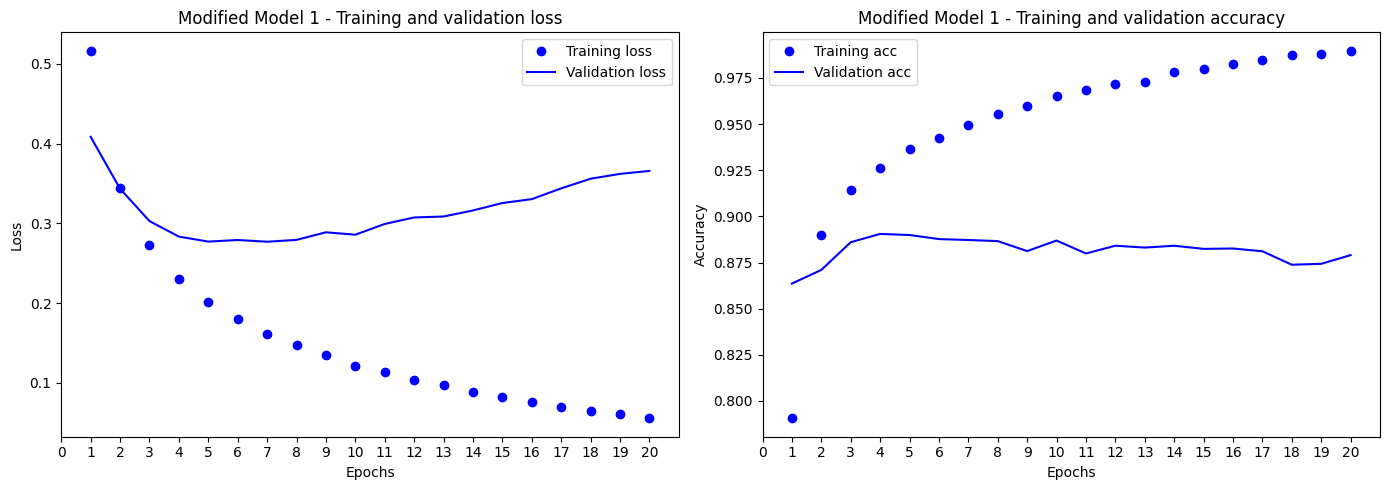

In [345]:
# Plot
modified_model_1_history_dict = modified_model_1_history.history
modified_model_1_loss_values = modified_model_1_history_dict["loss"]
modified_model_1_val_loss_values = modified_model_1_history_dict["val_loss"]
modified_model_1_epochs = range(1, len(modified_model_1_loss_values) + 1)
modified_model_1_acc = modified_model_1_history_dict["accuracy"]
modified_model_1_val_acc = modified_model_1_history_dict["val_accuracy"]

# Create a figure with 1 row and 2 columns for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot for Loss
ax1.plot(modified_model_1_epochs, modified_model_1_loss_values, "bo", label="Training loss")
ax1.plot(modified_model_1_epochs, modified_model_1_val_loss_values, "b", label="Validation loss")
ax1.set_title("Modified Model 1 - Training and validation loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_xlim([0, 21])
ax1.set_xticks(range(0, 21, 1))
ax1.legend()

# Plot for Accuracy
ax2.plot(modified_model_1_epochs, modified_model_1_acc, "bo", label="Training acc")
ax2.plot(modified_model_1_epochs, modified_model_1_val_acc, "b", label="Validation acc")
ax2.set_title("Modified Model 1 - Training and validation accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.set_xlim([0, 21])
ax2.set_xticks(range(0, 21, 1))
ax2.legend()

# Show the combined figure
plt.tight_layout()
plt.show()

For the first modified model, the highest accuracy and the smallest loss value is at epoch = 5.\
I will retrain with epoch = 5 then evaluate the model with the test data.

In [251]:
modified_model_R1 = keras.Sequential([
   layers.Dense(16, activation='relu'),
   layers.Dense(1, activation='sigmoid')
])

modified_model_R1.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

modified_model_R1_epoch = 5

modified_model_R1.fit(partial_x_train, 
                              partial_y_train, 
                              epochs=modified_model_R1_epoch,
                              batch_size=512, 
                              validation_data=(x_val, y_val))

Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.7058 - loss: 0.5991 - val_accuracy: 0.8461 - val_loss: 0.4340
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8911 - loss: 0.3708 - val_accuracy: 0.8678 - val_loss: 0.3539
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9113 - loss: 0.2938 - val_accuracy: 0.8774 - val_loss: 0.3172
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9242 - loss: 0.2433 - val_accuracy: 0.8833 - val_loss: 0.2948
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9328 - loss: 0.2120 - val_accuracy: 0.8866 - val_loss: 0.2840


In [252]:
modified_model_R1_results = modified_model_R1.evaluate(x_test, y_test)
print("Retrained Modeified Model 1 - Test Accuracy: ", round(modified_model_R1_results[1],4))
print("Retrained Modifired Model 1 - Test Loss Value: ", round(modified_model_R1_results[0],4))

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8791 - loss: 0.2964
Retrained Modeified Model 1 - Test Accuracy:  0.8804
Retrained Modifired Model 1 - Test Loss Value:  0.2966


### 3.2. Modified Model 2
- 16 nodes
- 3 hidden layers
- Relu Activation function

In [255]:
modified_model_2 = keras.Sequential([
   layers.Dense(16, activation='relu'),
   layers.Dense(16, activation='relu'),
   layers.Dense(16, activation='relu'),
   layers.Dense(1, activation='sigmoid')
])

modified_model_2.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

modified_model_2_history = modified_model_2.fit(partial_x_train, 
                              partial_y_train, 
                              epochs=20,
                              batch_size=512, 
                              validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.6604 - loss: 0.6350 - val_accuracy: 0.8628 - val_loss: 0.4264
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8824 - loss: 0.3739 - val_accuracy: 0.8792 - val_loss: 0.3228
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9150 - loss: 0.2593 - val_accuracy: 0.8817 - val_loss: 0.2956
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9344 - loss: 0.1962 - val_accuracy: 0.8565 - val_loss: 0.3504
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9478 - loss: 0.1601 - val_accuracy: 0.8876 - val_loss: 0.2836
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9599 - loss: 0.1298 - val_accuracy: 0.8867 - val_loss: 0.2887
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9679 - loss: 0.1060 - val_accuracy: 0.8827 - val_loss: 0.3190
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9759 - loss: 0.0837 - val_accuracy: 0.8833 - v

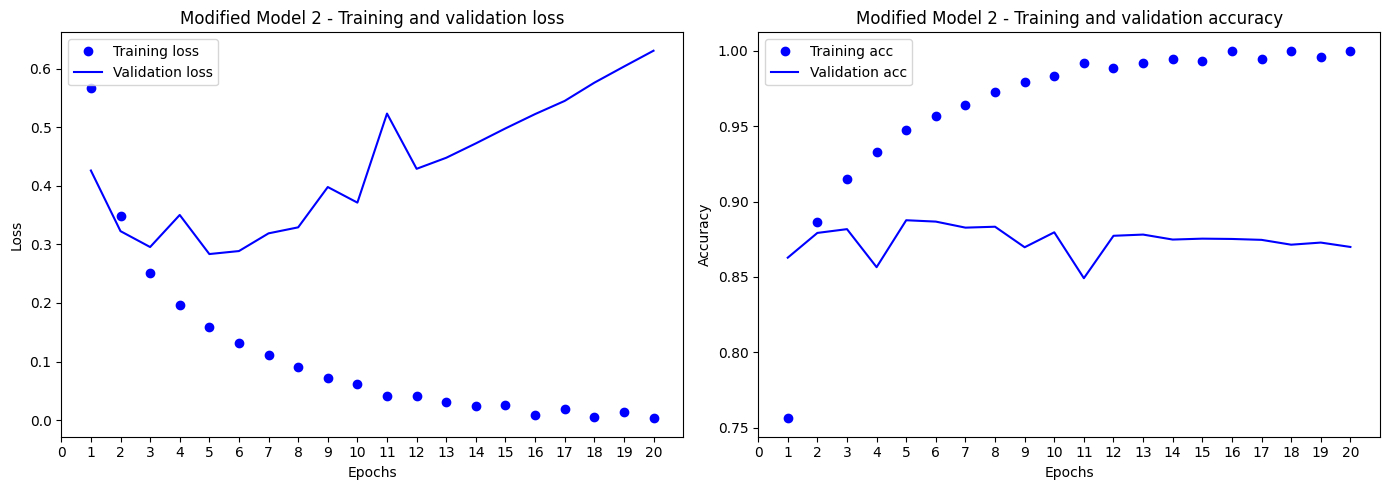

In [256]:
# Plot
modified_model_2_history_dict = modified_model_2_history.history
modified_model_2_loss_values = modified_model_2_history_dict["loss"]
modified_model_2_val_loss_values = modified_model_2_history_dict["val_loss"]
modified_model_2_epochs = range(1, len(modified_model_2_loss_values) + 1)
modified_model_2_acc = modified_model_2_history_dict["accuracy"]
modified_model_2_val_acc = modified_model_2_history_dict["val_accuracy"]

# Create a figure with 1 row and 2 columns for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot for Loss
ax1.plot(modified_model_2_epochs, modified_model_2_loss_values, "bo", label="Training loss")
ax1.plot(modified_model_2_epochs, modified_model_2_val_loss_values, "b", label="Validation loss")
ax1.set_title("Modified Model 2 - Training and validation loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_xlim([0, 21])
ax1.set_xticks(range(0, 21, 1))
ax1.legend()

# Plot for Accuracy
ax2.plot(modified_model_2_epochs, modified_model_2_acc, "bo", label="Training acc")
ax2.plot(modified_model_2_epochs, modified_model_2_val_acc, "b", label="Validation acc")
ax2.set_title("Modified Model 2 - Training and validation accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.set_xlim([0, 21])
ax2.set_xticks(range(0, 21, 1))
ax2.legend()

# Show the combined figure
plt.tight_layout()
plt.show()

For the second modified model, the highest accuracy and the smallest loss value is at epoch = 3.\
I will retrain with epoch = 3 then evaluate the model with the test data.`

In [257]:
modified_model_R2 = keras.Sequential([
   layers.Dense(16, activation='relu'),
   layers.Dense(16, activation='relu'),
   layers.Dense(16, activation='relu'),
   layers.Dense(1, activation='sigmoid')
])

modified_model_R2.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

modified_model_R2_epoch = 3

modified_model_R2.fit(partial_x_train, 
                              partial_y_train, 
                              epochs=modified_model_R2_epoch,
                              batch_size=512, 
                              validation_data=(x_val, y_val))

Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.6607 - loss: 0.6466 - val_accuracy: 0.8064 - val_loss: 0.4855
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8694 - loss: 0.4187 - val_accuracy: 0.8735 - val_loss: 0.3475
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9111 - loss: 0.2867 - val_accuracy: 0.8858 - val_loss: 0.2951


In [258]:
modified_model_R2_results = modified_model_R2.evaluate(x_test, y_test)
print("Retrained Modeified Model 2 - Test Accuracy: ", round(modified_model_R2_results[1],4))
print("Retrained Modifired Model 2 - Test Loss Value: ", round(modified_model_R2_results[0],4))

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8813 - loss: 0.3084
Retrained Modeified Model 2 - Test Accuracy:  0.8806
Retrained Modifired Model 2 - Test Loss Value:  0.3071


### 4. Q2: More vs Less nodes in the hidden layers

#### 4.1. Modified Model 3
- 8 nodes
- 2 hidden layers
- Relu Activation function

In [259]:
modified_model_3 = keras.Sequential([
   layers.Dense(8, activation='relu'),
   layers.Dense(8, activation='relu'),
   layers.Dense(1, activation='sigmoid')
])

modified_model_3.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

modified_model_3_history = modified_model_3.fit(partial_x_train, 
                              partial_y_train, 
                              epochs=20,
                              batch_size=512, 
                              validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.6570 - loss: 0.6326 - val_accuracy: 0.8557 - val_loss: 0.4648
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8827 - loss: 0.4084 - val_accuracy: 0.8524 - val_loss: 0.3722
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9139 - loss: 0.2931 - val_accuracy: 0.8874 - val_loss: 0.3059
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9290 - loss: 0.2341 - val_accuracy: 0.8782 - val_loss: 0.2997
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9386 - loss: 0.1942 - val_accuracy: 0.8872 - val_loss: 0.2793
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9450 - loss: 0.1723 - val_accuracy: 0.8867 - val_loss: 0.2788
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9556 - loss: 0.1472 - val_accuracy: 0.8837 - val_loss: 0.2912
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9615 - loss: 0.1255 - val_accuracy: 0.8862 - v

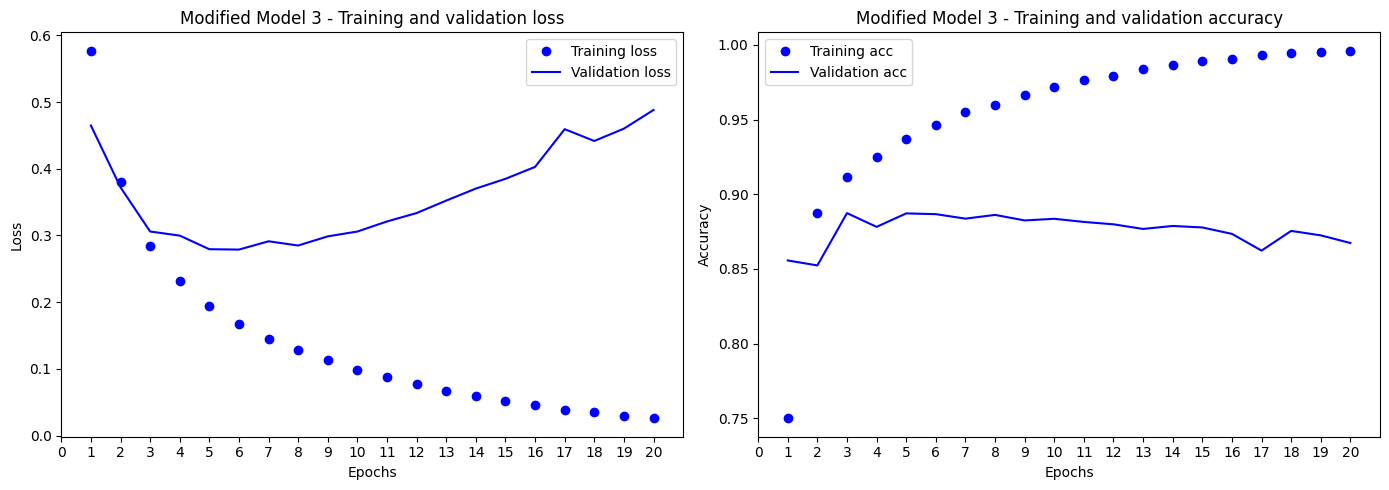

In [265]:
# Plot
modified_model_3_history_dict = modified_model_3_history.history
modified_model_3_loss_values = modified_model_3_history_dict["loss"]
modified_model_3_val_loss_values = modified_model_3_history_dict["val_loss"]
modified_model_3_epochs = range(1, len(modified_model_3_loss_values) + 1)
modified_model_3_acc = modified_model_3_history_dict["accuracy"]
modified_model_3_val_acc = modified_model_3_history_dict["val_accuracy"]

# Create a figure with 1 row and 2 columns for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot for Loss
ax1.plot(modified_model_3_epochs, modified_model_3_loss_values, "bo", label="Training loss")
ax1.plot(modified_model_3_epochs, modified_model_3_val_loss_values, "b", label="Validation loss")
ax1.set_title("Modified Model 3 - Training and validation loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_xlim([0, 21])
ax1.set_xticks(range(0, 21, 1))
ax1.legend()

# Plot for Accuracy
ax2.plot(modified_model_3_epochs, modified_model_3_acc, "bo", label="Training acc")
ax2.plot(modified_model_3_epochs, modified_model_3_val_acc, "b", label="Validation acc")
ax2.set_title("Modified Model 3 - Training and validation accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.set_xlim([0, 21])
ax2.set_xticks(range(0, 21, 1))
ax2.legend()

# Show the combined figure
plt.tight_layout()
plt.show()

For the third modified model, the highest accuracy and the smallest loss value is at epoch = 6.\
I will retrain with epoch = 6 then evaluate the model with the test data.

In [261]:
modified_model_R3 = keras.Sequential([
   layers.Dense(8, activation='relu'),
   layers.Dense(8, activation='relu'),
   layers.Dense(1, activation='sigmoid')
])

modified_model_R3.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

modified_model_R3_epoch = 6

modified_model_R3.fit(partial_x_train, 
                              partial_y_train, 
                              epochs=modified_model_R3_epoch,
                              batch_size=512, 
                              validation_data=(x_val, y_val))

Epoch 1/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.6824 - loss: 0.6422 - val_accuracy: 0.7929 - val_loss: 0.5187
Epoch 2/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8622 - loss: 0.4616 - val_accuracy: 0.8751 - val_loss: 0.4001
Epoch 3/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9095 - loss: 0.3450 - val_accuracy: 0.8820 - val_loss: 0.3394
Epoch 4/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9266 - loss: 0.2712 - val_accuracy: 0.8877 - val_loss: 0.3030
Epoch 5/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9362 - loss: 0.2250 - val_accuracy: 0.8897 - val_loss: 0.2851
Epoch 6/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9452 - loss: 0.1905 - val_accuracy: 0.8897 - val_loss: 0.2777


In [262]:
modified_model_R3_results = modified_model_R3.evaluate(x_test, y_test)
print("Retrained Modeified Model 3 - Test Accuracy: ", round(modified_model_R3_results[1],4))
print("Retrained Modifired Model 3 - Test Loss Value: ", round(modified_model_R3_results[0],4))

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8818 - loss: 0.2923
Retrained Modeified Model 3 - Test Accuracy:  0.8837
Retrained Modifired Model 3 - Test Loss Value:  0.2913


#### 4.2. Modified Model 4
- 32 nodes
- 2 hidden layers
- Relu Activation function

In [354]:
modified_model_4 = keras.Sequential([
   layers.Dense(32, activation='relu'),
   layers.Dense(32, activation='relu'),
   layers.Dense(1, activation='sigmoid')
])

modified_model_4.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

modified_model_4_history = modified_model_4.fit(partial_x_train, 
                              partial_y_train, 
                              epochs=20,
                              batch_size=512, 
                              validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.6704 - loss: 0.5950 - val_accuracy: 0.8361 - val_loss: 0.3946
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8915 - loss: 0.3123 - val_accuracy: 0.8811 - val_loss: 0.3017
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9309 - loss: 0.2179 - val_accuracy: 0.8874 - val_loss: 0.2790
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9398 - loss: 0.1782 - val_accuracy: 0.8792 - val_loss: 0.2950
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9547 - loss: 0.1433 - val_accuracy: 0.8863 - val_loss: 0.2821
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9590 - loss: 0.1259 - val_accuracy: 0.8853 - val_loss: 0.2953
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9684 - loss: 0.1008 - val_accuracy: 0.8753 - val_loss: 0.3431
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9761 - loss: 0.0835 - val_accuracy: 0.8786 - 

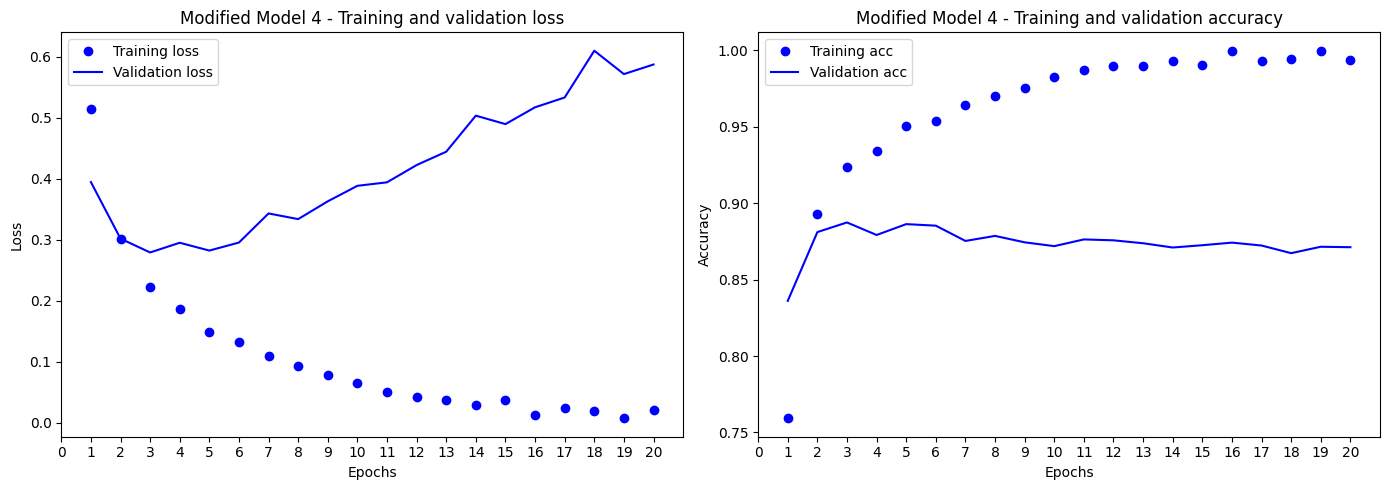

In [356]:
# Plot
modified_model_4_history_dict = modified_model_4_history.history
modified_model_4_loss_values = modified_model_4_history_dict["loss"]
modified_model_4_val_loss_values = modified_model_4_history_dict["val_loss"]
modified_model_4_epochs = range(1, len(modified_model_4_loss_values) + 1)
modified_model_4_acc = modified_model_4_history_dict["accuracy"]
modified_model_4_val_acc = modified_model_4_history_dict["val_accuracy"]

# Create a figure with 1 row and 2 columns for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot for Loss
ax1.plot(modified_model_4_epochs, modified_model_4_loss_values, "bo", label="Training loss")
ax1.plot(modified_model_4_epochs, modified_model_4_val_loss_values, "b", label="Validation loss")
ax1.set_title("Modified Model 4 - Training and validation loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_xlim([0, 21])
ax1.set_xticks(range(0, 21, 1))
ax1.legend()

# Plot for Accuracy
ax2.plot(modified_model_4_epochs, modified_model_4_acc, "bo", label="Training acc")
ax2.plot(modified_model_4_epochs, modified_model_4_val_acc, "b", label="Validation acc")
ax2.set_title("Modified Model 4 - Training and validation accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.set_xlim([0, 21])
ax2.set_xticks(range(0, 21, 1))
ax2.legend()

# Show the combined figure
plt.tight_layout()
plt.show()

For the forth modified model, the highest accuracy and the smallest loss value is at epoch = 4.\
I will retrain with epoch = 4 then evaluate the model with the test data.

In [357]:
modified_model_R4 = keras.Sequential([
   layers.Dense(32, activation='relu'),
   layers.Dense(32, activation='relu'),
   layers.Dense(1, activation='sigmoid')
])

modified_model_R4.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

modified_model_R4_epoch = 4

modified_model_R4.fit(partial_x_train, 
                              partial_y_train, 
                              epochs=modified_model_R4_epoch,
                              batch_size=512, 
                              validation_data=(x_val, y_val))

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.6743 - loss: 0.5981 - val_accuracy: 0.8624 - val_loss: 0.3865
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8914 - loss: 0.3310 - val_accuracy: 0.8797 - val_loss: 0.3093
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9268 - loss: 0.2312 - val_accuracy: 0.8852 - val_loss: 0.2859
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9388 - loss: 0.1850 - val_accuracy: 0.8872 - val_loss: 0.2740


In [358]:
modified_model_R4_results = modified_model_R4.evaluate(x_test, y_test)
print("Retrained Modeified Model 4 - Test Accuracy: ", round(modified_model_R4_results[1],4))
print("Retrained Modifired Model 4 - Test Loss Value: ", round(modified_model_R4_results[0],4))

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8799 - loss: 0.2910
Retrained Modeified Model 4 - Test Accuracy:  0.8832
Retrained Modifired Model 4 - Test Loss Value:  0.2896


#### 4.3. Modified Model 5
- 64 nodes
- 2 hidden layers
- Relu Activation function

In [269]:
modified_model_5 = keras.Sequential([
   layers.Dense(64, activation='relu'),
   layers.Dense(64, activation='relu'),
   layers.Dense(1, activation='sigmoid')
])

modified_model_5.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

modified_model_5_history = modified_model_5.fit(partial_x_train, 
                              partial_y_train, 
                              epochs=20,
                              batch_size=512, 
                              validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.6887 - loss: 0.5872 - val_accuracy: 0.8731 - val_loss: 0.3467
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8860 - loss: 0.3076 - val_accuracy: 0.8720 - val_loss: 0.3129
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9173 - loss: 0.2260 - val_accuracy: 0.8886 - val_loss: 0.2766
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9348 - loss: 0.1810 - val_accuracy: 0.8808 - val_loss: 0.2927
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9475 - loss: 0.1476 - val_accuracy: 0.8818 - val_loss: 0.2979
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9583 - loss: 0.1194 - val_accuracy: 0.8847 - val_loss: 0.3061
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9668 - loss: 0.0980 - val_accuracy: 0.8812 - val_loss: 0.3247
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9804 - loss: 0.0695 - val_accuracy: 0.8808 - v

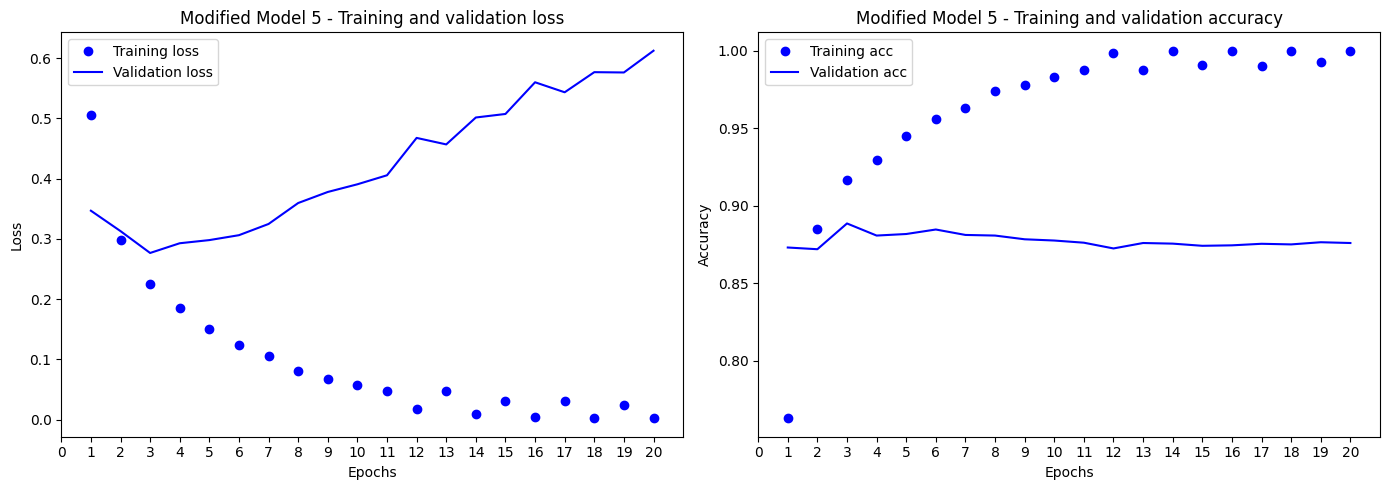

In [270]:
# Plot
modified_model_5_history_dict = modified_model_5_history.history
modified_model_5_loss_values = modified_model_5_history_dict["loss"]
modified_model_5_val_loss_values = modified_model_5_history_dict["val_loss"]
modified_model_5_epochs = range(1, len(modified_model_5_loss_values) + 1)
modified_model_5_acc = modified_model_5_history_dict["accuracy"]
modified_model_5_val_acc = modified_model_5_history_dict["val_accuracy"]

# Create a figure with 1 row and 2 columns for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot for Loss
ax1.plot(modified_model_5_epochs, modified_model_5_loss_values, "bo", label="Training loss")
ax1.plot(modified_model_5_epochs, modified_model_5_val_loss_values, "b", label="Validation loss")
ax1.set_title("Modified Model 5 - Training and validation loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_xlim([0, 21])
ax1.set_xticks(range(0, 21, 1))
ax1.legend()

# Plot for Accuracy
ax2.plot(modified_model_5_epochs, modified_model_5_acc, "bo", label="Training acc")
ax2.plot(modified_model_5_epochs, modified_model_5_val_acc, "b", label="Validation acc")
ax2.set_title("Modified Model 5 - Training and validation accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.set_xlim([0, 21])
ax2.set_xticks(range(0, 21, 1))
ax2.legend()

# Show the combined figure
plt.tight_layout()
plt.show()

For the fifth modified model, the highest accuracy and the smallest loss value is at epoch = 3.\
I will retrain with epoch = 3 then evaluate the model with the test data.

In [271]:
modified_model_R5 = keras.Sequential([
   layers.Dense(64, activation='relu'),
   layers.Dense(64, activation='relu'),
   layers.Dense(1, activation='sigmoid')
])

modified_model_R5.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

modified_model_R5_epoch = 3

modified_model_R5.fit(partial_x_train, 
                              partial_y_train, 
                              epochs=modified_model_R5_epoch,
                              batch_size=512, 
                              validation_data=(x_val, y_val))

Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.6785 - loss: 0.5905 - val_accuracy: 0.8627 - val_loss: 0.3599
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8796 - loss: 0.3153 - val_accuracy: 0.8550 - val_loss: 0.3456
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9119 - loss: 0.2328 - val_accuracy: 0.8871 - val_loss: 0.2796


In [272]:
modified_model_R5_results = modified_model_R5.evaluate(x_test, y_test)
print("Retrained Modeified Model 5 - Test Accuracy: ", round(modified_model_R5_results[1],4))
print("Retrained Modifired Model 5 - Test Loss Value: ", round(modified_model_R5_results[0],4))

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8794 - loss: 0.2937
Retrained Modeified Model 5 - Test Accuracy:  0.882
Retrained Modifired Model 5 - Test Loss Value:  0.2914


### 5. Q3: Using MSE as the loss function instead of binary_crossentropy

### 5.1. Modified Model 6
- 16 nodes
- 2 hidden layers
- Relu Activation function
- MSE loss function

In [273]:
modified_model_6 = keras.Sequential([
   layers.Dense(16, activation='relu'),
   layers.Dense(16, activation='relu'),
   layers.Dense(1, activation='sigmoid')
])

modified_model_6.compile(optimizer='rmsprop',
              loss = 'mse',
              metrics=['accuracy'])

modified_model_6_history = modified_model_6.fit(partial_x_train, 
                              partial_y_train, 
                              epochs=20,
                              batch_size=512, 
                              validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.6728 - loss: 0.2145 - val_accuracy: 0.8370 - val_loss: 0.1382
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8855 - loss: 0.1137 - val_accuracy: 0.8795 - val_loss: 0.1020
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9139 - loss: 0.0819 - val_accuracy: 0.8616 - val_loss: 0.1045
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9251 - loss: 0.0686 - val_accuracy: 0.8835 - val_loss: 0.0902
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9324 - loss: 0.0585 - val_accuracy: 0.8885 - val_loss: 0.0842
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9525 - loss: 0.0478 - val_accuracy: 0.8854 - val_loss: 0.0843
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9579 - loss: 0.0419 - val_accuracy: 0.8811 - val_loss: 0.0877
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9604 - loss: 0.0397 - val_accuracy: 0.8848 - v

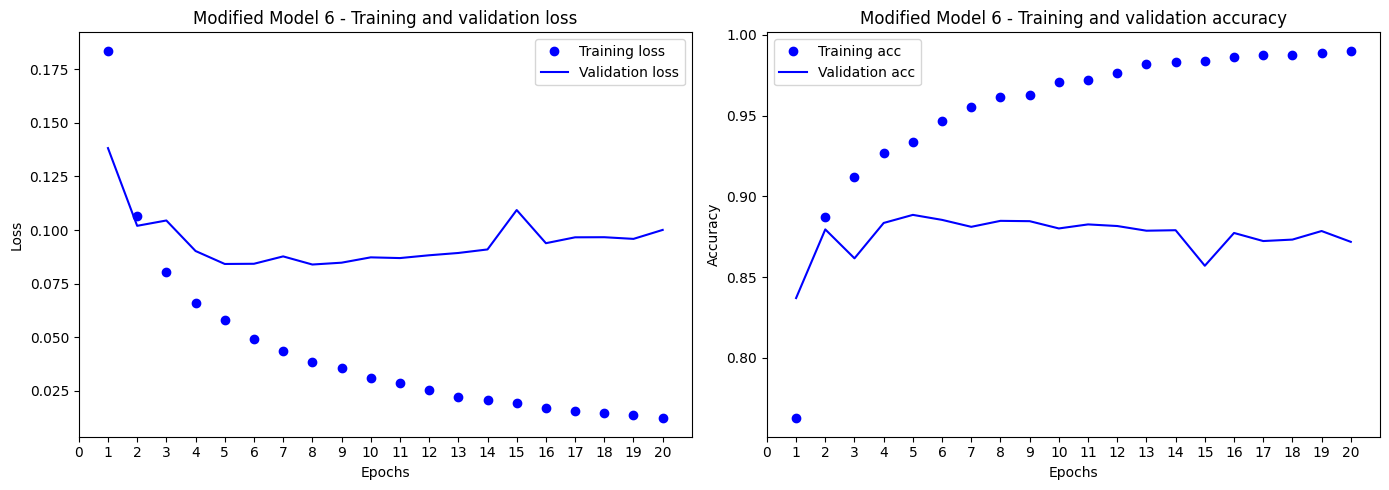

In [274]:
# Plot
modified_model_6_history_dict = modified_model_6_history.history
modified_model_6_loss_values = modified_model_6_history_dict["loss"]
modified_model_6_val_loss_values = modified_model_6_history_dict["val_loss"]
modified_model_6_epochs = range(1, len(modified_model_6_loss_values) + 1)
modified_model_6_acc = modified_model_6_history_dict["accuracy"]
modified_model_6_val_acc = modified_model_6_history_dict["val_accuracy"]

# Create a figure with 1 row and 2 columns for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot for Loss
ax1.plot(modified_model_6_epochs, modified_model_6_loss_values, "bo", label="Training loss")
ax1.plot(modified_model_6_epochs, modified_model_6_val_loss_values, "b", label="Validation loss")
ax1.set_title("Modified Model 6 - Training and validation loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_xlim([0, 21])
ax1.set_xticks(range(0, 21, 1))
ax1.legend()

# Plot for Accuracy
ax2.plot(modified_model_6_epochs, modified_model_6_acc, "bo", label="Training acc")
ax2.plot(modified_model_6_epochs, modified_model_6_val_acc, "b", label="Validation acc")
ax2.set_title("Modified Model 6 - Training and validation accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.set_xlim([0, 21])
ax2.set_xticks(range(0, 21, 1))
ax2.legend()

# Show the combined figure
plt.tight_layout()
plt.show()

For the sixth modified model, the highest accuracy and the smallest loss value is at epoch = 2.\
I will retrain with epoch = 2 then evaluate the model with the test data.

In [280]:
modified_model_R6 = keras.Sequential([
   layers.Dense(16, activation='relu'),
   layers.Dense(16, activation='relu'),
   layers.Dense(1, activation='sigmoid')
])

modified_model_R6.compile(optimizer='rmsprop',
              loss = 'mse',
              metrics=['accuracy'])

modified_model_R6_epoch = 2

modified_model_R6_history = modified_model_R6.fit(partial_x_train, 
                              partial_y_train, 
                              epochs=modified_model_R6_epoch,
                              batch_size=512, 
                              validation_data=(x_val, y_val))

Epoch 1/2
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.6714 - loss: 0.2102 - val_accuracy: 0.8653 - val_loss: 0.1233
Epoch 2/2
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8845 - loss: 0.1079 - val_accuracy: 0.8857 - val_loss: 0.0972


In [282]:
modified_model_R6_results = modified_model_R4.evaluate(x_test, y_test)
print("Retrained Modeified Model 6 - Test Accuracy: ", round(modified_model_R6_results[1],4))
print("Retrained Modifired Model 6 - Test Loss Value: ", round(modified_model_R6_results[0],4))

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8650 - loss: 0.3294
Retrained Modeified Model 6 - Test Accuracy:  0.8647
Retrained Modifired Model 6 - Test Loss Value:  0.3315


### 6. Q4: ReLU vs Tanh activation function

#### 6.1. Modified Model 7
- 8 nodes
- 2 hidden layers
- Tanh Activation function
- binary_crossentropy loss function

In [277]:
modified_model_7 = keras.Sequential([
   layers.Dense(8, activation='tanh'),
   layers.Dense(8, activation='tanh'),
   layers.Dense(1, activation='sigmoid')
])

modified_model_7.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

modified_model_7_history = modified_model_7.fit(partial_x_train, 
                              partial_y_train, 
                              epochs=20,
                              batch_size=512, 
                              validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.7001 - loss: 0.6188 - val_accuracy: 0.8480 - val_loss: 0.4710
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8844 - loss: 0.4198 - val_accuracy: 0.8638 - val_loss: 0.3849
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9100 - loss: 0.3210 - val_accuracy: 0.8791 - val_loss: 0.3304
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9263 - loss: 0.2570 - val_accuracy: 0.8812 - val_loss: 0.3041
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9377 - loss: 0.2153 - val_accuracy: 0.8896 - val_loss: 0.2788
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9518 - loss: 0.1740 - val_accuracy: 0.8891 - val_loss: 0.2733
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9606 - loss: 0.1468 - val_accuracy: 0.8837 - val_loss: 0.2885
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9674 - loss: 0.1239 - val_accuracy: 0.8831 - v

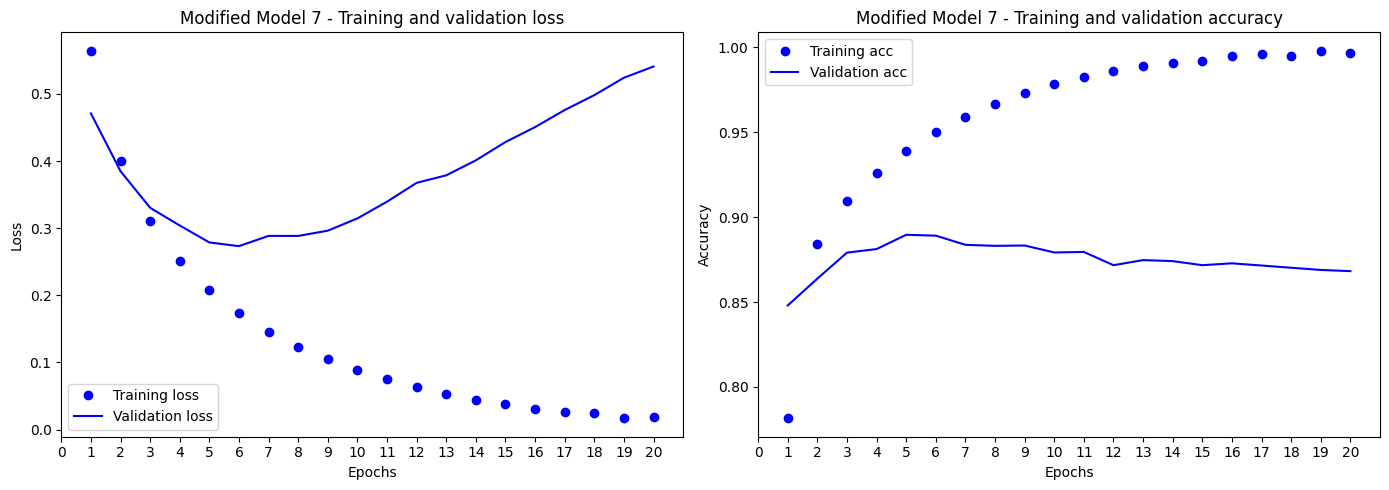

In [278]:
# Plot
modified_model_7_history_dict = modified_model_7_history.history
modified_model_7_loss_values = modified_model_7_history_dict["loss"]
modified_model_7_val_loss_values = modified_model_7_history_dict["val_loss"]
modified_model_7_epochs = range(1, len(modified_model_7_loss_values) + 1)
modified_model_7_acc = modified_model_7_history_dict["accuracy"]
modified_model_7_val_acc = modified_model_7_history_dict["val_accuracy"]

# Create a figure with 1 row and 2 columns for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot for Loss
ax1.plot(modified_model_7_epochs, modified_model_7_loss_values, "bo", label="Training loss")
ax1.plot(modified_model_7_epochs, modified_model_7_val_loss_values, "b", label="Validation loss")
ax1.set_title("Modified Model 7 - Training and validation loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_xlim([0, 21])
ax1.set_xticks(range(0, 21, 1))
ax1.legend()

# Plot for Accuracy
ax2.plot(modified_model_7_epochs, modified_model_7_acc, "bo", label="Training acc")
ax2.plot(modified_model_7_epochs, modified_model_7_val_acc, "b", label="Validation acc")
ax2.set_title("Modified Model 7 - Training and validation accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.set_xlim([0, 21])
ax2.set_xticks(range(0, 21, 1))
ax2.legend()

# Show the combined figure
plt.tight_layout()
plt.show()

For the seventh modified model, the highest accuracy and the smallest loss value is at epoch = 6.\
I will retrain with epoch = 6 then evaluate the model with the test data.

In [283]:
modified_model_R7 = keras.Sequential([
   layers.Dense(8, activation='tanh'),
   layers.Dense(8, activation='tanh'),
   layers.Dense(1, activation='sigmoid')
])

modified_model_R7.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

modified_model_R7_epoch = 6

modified_model_R7_history = modified_model_R7.fit(partial_x_train, 
                              partial_y_train, 
                              epochs=modified_model_R7_epoch,
                              batch_size=512, 
                              validation_data=(x_val, y_val))

Epoch 1/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.7056 - loss: 0.5992 - val_accuracy: 0.8612 - val_loss: 0.4328
Epoch 2/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8901 - loss: 0.3802 - val_accuracy: 0.8805 - val_loss: 0.3434
Epoch 3/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9204 - loss: 0.2823 - val_accuracy: 0.8858 - val_loss: 0.3038
Epoch 4/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9365 - loss: 0.2238 - val_accuracy: 0.8840 - val_loss: 0.2894
Epoch 5/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9460 - loss: 0.1865 - val_accuracy: 0.8873 - val_loss: 0.2784
Epoch 6/6
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9574 - loss: 0.1531 - val_accuracy: 0.8873 - val_loss: 0.2752


In [285]:
modified_model_R7_results = modified_model_R7.evaluate(x_test, y_test)
print("Retrained Modeified Model 7 - Test Accuracy: ", round(modified_model_R7_results[1],4))
print("Retrained Modifired Model 7 - Test Loss Value: ", round(modified_model_R7_results[0],4))

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8779 - loss: 0.2949
Retrained Modeified Model 7 - Test Accuracy:  0.8794
Retrained Modifired Model 7 - Test Loss Value:  0.2933


#### 6.2. Modified Model 8
- 16 nodes
- 2 hidden layers
- Tanh Activation function
- binary_crossentropy loss function

In [286]:
modified_model_8 = keras.Sequential([
   layers.Dense(16, activation='tanh'),
   layers.Dense(16,  activation='tanh'),
   layers.Dense(1, activation='sigmoid')
])

modified_model_8.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

modified_model_8_history = modified_model_8.fit(partial_x_train, 
                              partial_y_train, 
                              epochs=20,
                              batch_size=512, 
                              validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.6990 - loss: 0.5771 - val_accuracy: 0.8705 - val_loss: 0.3573
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9041 - loss: 0.2946 - val_accuracy: 0.8478 - val_loss: 0.3554
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9304 - loss: 0.2105 - val_accuracy: 0.8729 - val_loss: 0.3073
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9452 - loss: 0.1631 - val_accuracy: 0.8856 - val_loss: 0.2862
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9577 - loss: 0.1265 - val_accuracy: 0.8635 - val_loss: 0.3706
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9621 - loss: 0.1078 - val_accuracy: 0.8787 - val_loss: 0.3420
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9772 - loss: 0.0782 - val_accuracy: 0.8782 - val_loss: 0.3555
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9840 - loss: 0.0594 - val_accuracy: 0.8759 - v

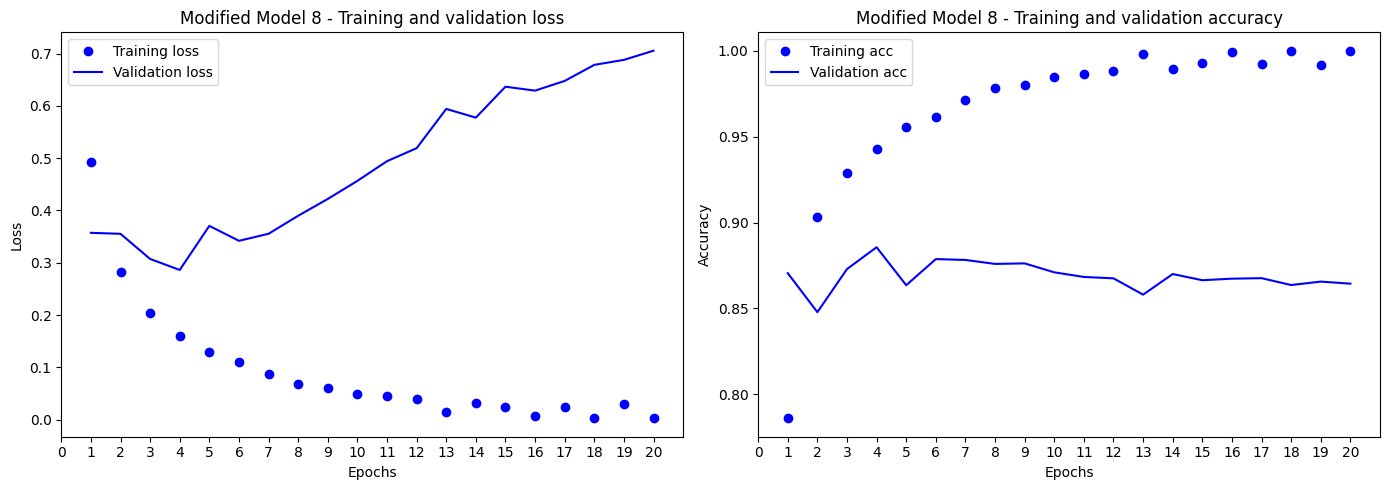

In [287]:
# Plot
modified_model_8_history_dict = modified_model_8_history.history
modified_model_8_loss_values = modified_model_8_history_dict["loss"]
modified_model_8_val_loss_values = modified_model_8_history_dict["val_loss"]
modified_model_8_epochs = range(1, len(modified_model_8_loss_values) + 1)
modified_model_8_acc = modified_model_8_history_dict["accuracy"]
modified_model_8_val_acc = modified_model_8_history_dict["val_accuracy"]

# Create a figure with 1 row and 2 columns for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot for Loss
ax1.plot(modified_model_8_epochs, modified_model_8_loss_values, "bo", label="Training loss")
ax1.plot(modified_model_8_epochs, modified_model_8_val_loss_values, "b", label="Validation loss")
ax1.set_title("Modified Model 8 - Training and validation loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_xlim([0, 21])
ax1.set_xticks(range(0, 21, 1))
ax1.legend()

# Plot for Accuracy
ax2.plot(modified_model_8_epochs, modified_model_8_acc, "bo", label="Training acc")
ax2.plot(modified_model_8_epochs, modified_model_8_val_acc, "b", label="Validation acc")
ax2.set_title("Modified Model 8 - Training and validation accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.set_xlim([0, 21])
ax2.set_xticks(range(0, 21, 1))
ax2.legend()

# Show the combined figure
plt.tight_layout()
plt.show()

For the eight modified model, the highest accuracy and the smallest loss value is at epoch = 4.\
I will retrain with epoch = 4 then evaluate the model with the test data.

In [288]:
modified_model_R8 = keras.Sequential([
   layers.Dense(16, activation='tanh'),
   layers.Dense(16, activation='tanh'),
   layers.Dense(1, activation='sigmoid')
])

modified_model_R8.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

modified_model_R8_epoch = 4

modified_model_R8_history = modified_model_R8.fit(partial_x_train, 
                              partial_y_train, 
                              epochs=modified_model_R8_epoch,
                              batch_size=512, 
                              validation_data=(x_val, y_val))

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.7116 - loss: 0.5688 - val_accuracy: 0.8722 - val_loss: 0.3570
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9055 - loss: 0.2996 - val_accuracy: 0.8725 - val_loss: 0.3114
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9290 - loss: 0.2159 - val_accuracy: 0.8858 - val_loss: 0.2815
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9456 - loss: 0.1641 - val_accuracy: 0.8875 - val_loss: 0.2769


In [289]:
modified_model_R8_results = modified_model_R8.evaluate(x_test, y_test)
print("Retrained Modeified Model 8 - Test Accuracy: ", round(modified_model_R8_results[1],4))
print("Retrained Modifired Model 8 - Test Loss Value: ", round(modified_model_R8_results[0],4))

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8779 - loss: 0.2967
Retrained Modeified Model 8 - Test Accuracy:  0.8789
Retrained Modifired Model 8 - Test Loss Value:  0.2967


#### 6.3. Modified Model 9
- 32 nodes
- 2 hidden layers
- Tanh Activation function
- binary_crossentropy loss function

In [346]:
modified_model_9 = keras.Sequential([
   layers.Dense(32, activation='tanh'),
   layers.Dense(32,  activation='tanh'),
   layers.Dense(1, activation='sigmoid')
])

modified_model_9.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

modified_model_9_history = modified_model_9.fit(partial_x_train, 
                              partial_y_train, 
                              epochs=20,
                              batch_size=512, 
                              validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.7027 - loss: 0.5711 - val_accuracy: 0.8269 - val_loss: 0.3936
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8910 - loss: 0.2848 - val_accuracy: 0.8600 - val_loss: 0.3286
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9217 - loss: 0.2056 - val_accuracy: 0.8350 - val_loss: 0.4147
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9392 - loss: 0.1610 - val_accuracy: 0.8829 - val_loss: 0.2958
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9579 - loss: 0.1241 - val_accuracy: 0.8798 - val_loss: 0.3220
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9651 - loss: 0.0974 - val_accuracy: 0.8776 - val_loss: 0.3589
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9729 - loss: 0.0829 - val_accuracy: 0.8596 - val_loss: 0.4777
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9764 - loss: 0.0730 - val_accuracy: 0.8737 - 

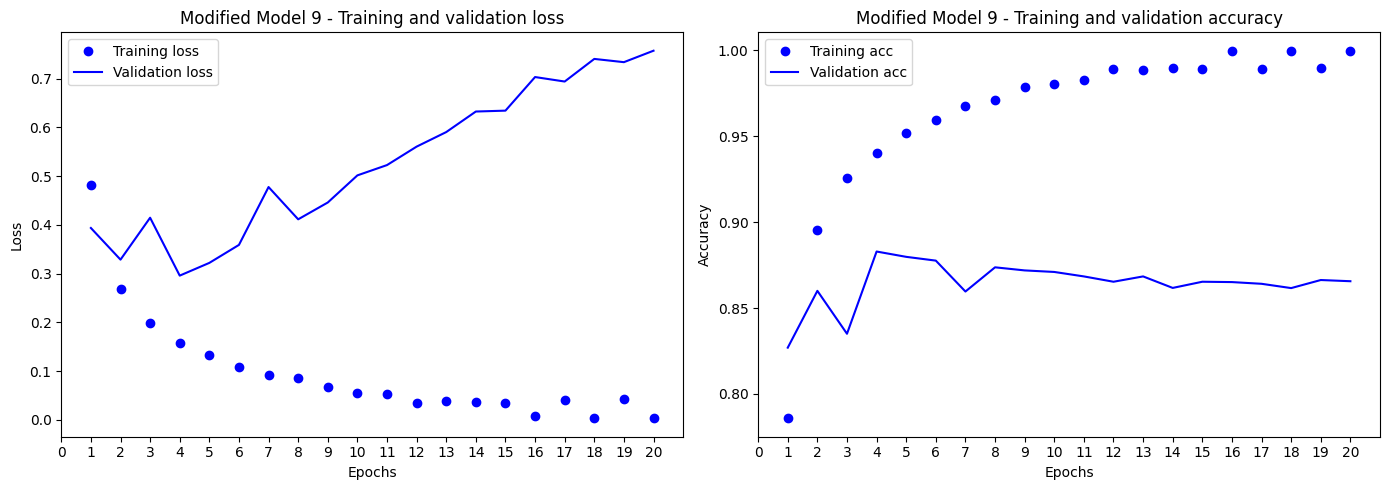

In [347]:
# Plot
modified_model_9_history_dict = modified_model_9_history.history
modified_model_9_loss_values = modified_model_9_history_dict["loss"]
modified_model_9_val_loss_values = modified_model_9_history_dict["val_loss"]
modified_model_9_epochs = range(1, len(modified_model_9_loss_values) + 1)
modified_model_9_acc = modified_model_9_history_dict["accuracy"]
modified_model_9_val_acc = modified_model_9_history_dict["val_accuracy"]

# Create a figure with 1 row and 2 columns for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot for Loss
ax1.plot(modified_model_9_epochs, modified_model_9_loss_values, "bo", label="Training loss")
ax1.plot(modified_model_9_epochs, modified_model_9_val_loss_values, "b", label="Validation loss")
ax1.set_title("Modified Model 9 - Training and validation loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_xlim([0, 21])
ax1.set_xticks(range(0, 21, 1))
ax1.legend()

# Plot for Accuracy
ax2.plot(modified_model_9_epochs, modified_model_9_acc, "bo", label="Training acc")
ax2.plot(modified_model_9_epochs, modified_model_9_val_acc, "b", label="Validation acc")
ax2.set_title("Modified Model 9 - Training and validation accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.set_xlim([0, 21])
ax2.set_xticks(range(0, 21, 1))
ax2.legend()

# Show the combined figure
plt.tight_layout()
plt.show()

For the ninth modified model, the highest accuracy and the smallest loss value is at epoch = 2.\
I will retrain with epoch = 2 then evaluate the model with the test data.

In [348]:
modified_model_R9 = keras.Sequential([
   layers.Dense(32, activation='tanh'),
   layers.Dense(32, activation='tanh'),
   layers.Dense(1, activation='sigmoid')
])

modified_model_R9.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

modified_model_R9_epoch = 2

modified_model_R9_history = modified_model_R9.fit(partial_x_train, 
                              partial_y_train, 
                              epochs=modified_model_R9_epoch,
                              batch_size=512, 
                              validation_data=(x_val, y_val))

Epoch 1/2
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.7272 - loss: 0.5563 - val_accuracy: 0.8670 - val_loss: 0.3417
Epoch 2/2
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8979 - loss: 0.2799 - val_accuracy: 0.8848 - val_loss: 0.2789


In [349]:
modified_model_R9_results = modified_model_R9.evaluate(x_test, y_test)
print("Retrained Modeified Model 9 - Test Accuracy: ", round(modified_model_R9_results[1],4))
print("Retrained Modifired Model 9 - Test Loss Value: ", round(modified_model_R9_results[0],4))

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8798 - loss: 0.2925
Retrained Modeified Model 9 - Test Accuracy:  0.8791
Retrained Modifired Model 9 - Test Loss Value:  0.2934


#### 6.4. Modified Model 10
- 64 nodes
- 2 hidden layers
- Tanh Activation function
- binary_crossentropy loss function

In [294]:
modified_model_10 = keras.Sequential([
   layers.Dense(64, activation='tanh'),
   layers.Dense(64,  activation='tanh'),
   layers.Dense(1, activation='sigmoid')
])

modified_model_10.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

modified_model_10_history = modified_model_10.fit(partial_x_train, 
                              partial_y_train, 
                              epochs=20,
                              batch_size=512, 
                              validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - accuracy: 0.7094 - loss: 0.5726 - val_accuracy: 0.8395 - val_loss: 0.3737
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8968 - loss: 0.2730 - val_accuracy: 0.8890 - val_loss: 0.2726
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9255 - loss: 0.2030 - val_accuracy: 0.8868 - val_loss: 0.2787
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9468 - loss: 0.1465 - val_accuracy: 0.8848 - val_loss: 0.3008
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9552 - loss: 0.1268 - val_accuracy: 0.8263 - val_loss: 0.5180
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9587 - loss: 0.1173 - val_accuracy: 0.8645 - val_loss: 0.4091
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9542 - loss: 0.1133 - val_accuracy: 0.8499 - val_loss: 0.5392
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9731 - loss: 0.0775 - val_accuracy: 0.8750 - v

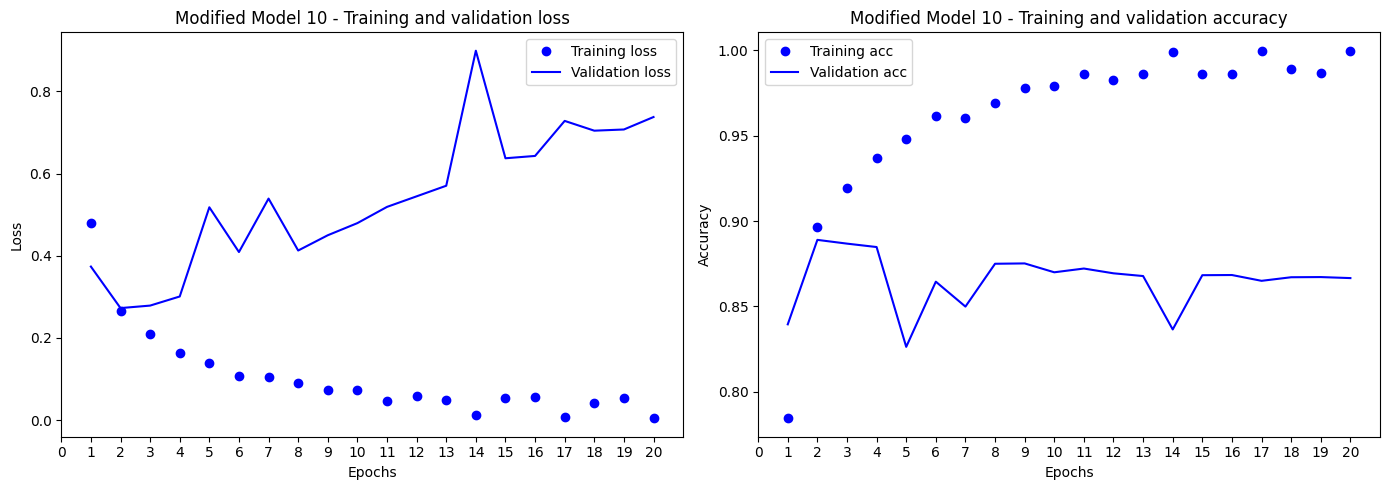

In [295]:
# Plot
modified_model_10_history_dict = modified_model_10_history.history
modified_model_10_loss_values = modified_model_10_history_dict["loss"]
modified_model_10_val_loss_values = modified_model_10_history_dict["val_loss"]
modified_model_10_epochs = range(1, len(modified_model_10_loss_values) + 1)
modified_model_10_acc = modified_model_10_history_dict["accuracy"]
modified_model_10_val_acc = modified_model_10_history_dict["val_accuracy"]

# Create a figure with 1 row and 2 columns for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot for Loss
ax1.plot(modified_model_10_epochs, modified_model_10_loss_values, "bo", label="Training loss")
ax1.plot(modified_model_10_epochs, modified_model_10_val_loss_values, "b", label="Validation loss")
ax1.set_title("Modified Model 10 - Training and validation loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_xlim([0, 21])
ax1.set_xticks(range(0, 21, 1))
ax1.legend()

# Plot for Accuracy
ax2.plot(modified_model_10_epochs, modified_model_10_acc, "bo", label="Training acc")
ax2.plot(modified_model_10_epochs, modified_model_10_val_acc, "b", label="Validation acc")
ax2.set_title("Modified Model 10 - Training and validation accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.set_xlim([0, 21])
ax2.set_xticks(range(0, 21, 1))
ax2.legend()

# Show the combined figure
plt.tight_layout()
plt.show()

For the tenth modified model, the highest accuracy and the smallest loss value is at epoch = 2.\
I will retrain with epoch = 2 then evaluate the model with the test data.

In [296]:
modified_model_R10 = keras.Sequential([
   layers.Dense(64, activation='tanh'),
   layers.Dense(64, activation='tanh'),
   layers.Dense(1, activation='sigmoid')
])

modified_model_R10.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

modified_model_R10_epoch = 2

modified_model_R10_history = modified_model_R10.fit(partial_x_train, 
                              partial_y_train, 
                              epochs=modified_model_R10_epoch,
                              batch_size=512, 
                              validation_data=(x_val, y_val))

Epoch 1/2
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.6914 - loss: 0.5877 - val_accuracy: 0.8741 - val_loss: 0.3184
Epoch 2/2
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8933 - loss: 0.2759 - val_accuracy: 0.8808 - val_loss: 0.2886


In [297]:
modified_model_R10_results = modified_model_R10.evaluate(x_test, y_test)
print("Retrained Modeified Model 10 - Test Accuracy: ", round(modified_model_R10_results[1],4))
print("Retrained Modifired Model 10 - Test Loss Value: ", round(modified_model_R10_results[0],4))

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8773 - loss: 0.2986
Retrained Modeified Model 10 - Test Accuracy:  0.875
Retrained Modifired Model 10 - Test Loss Value:  0.3023


### 7. Q5: Regularization vs Dropout

#### 7.1. Modified Model 11
- 16 nodes
- 2 hidden layers
- ReLU activation function
- binary_crossentropy loss function
- Regularization at 0.002

In [336]:
modified_model_11 = keras.Sequential([
   layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.000001)),
   layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.000001)),
   layers.Dense(1, activation='sigmoid')
])

modified_model_11.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

modified_model_11_history = modified_model_11.fit(partial_x_train, 
                              partial_y_train, 
                              epochs=20,
                              batch_size=512, 
                              validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.6961 - loss: 0.6259 - val_accuracy: 0.8307 - val_loss: 0.4590
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8785 - loss: 0.4017 - val_accuracy: 0.8760 - val_loss: 0.3439
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9113 - loss: 0.2841 - val_accuracy: 0.8856 - val_loss: 0.2982
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9305 - loss: 0.2167 - val_accuracy: 0.8853 - val_loss: 0.2879
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9410 - loss: 0.1784 - val_accuracy: 0.8787 - val_loss: 0.3005
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9537 - loss: 0.1508 - val_accuracy: 0.8870 - val_loss: 0.2782
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9635 - loss: 0.1262 - val_accuracy: 0.8827 - val_loss: 0.2926
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9687 - loss: 0.1132 - val_accuracy: 0.8856 - 

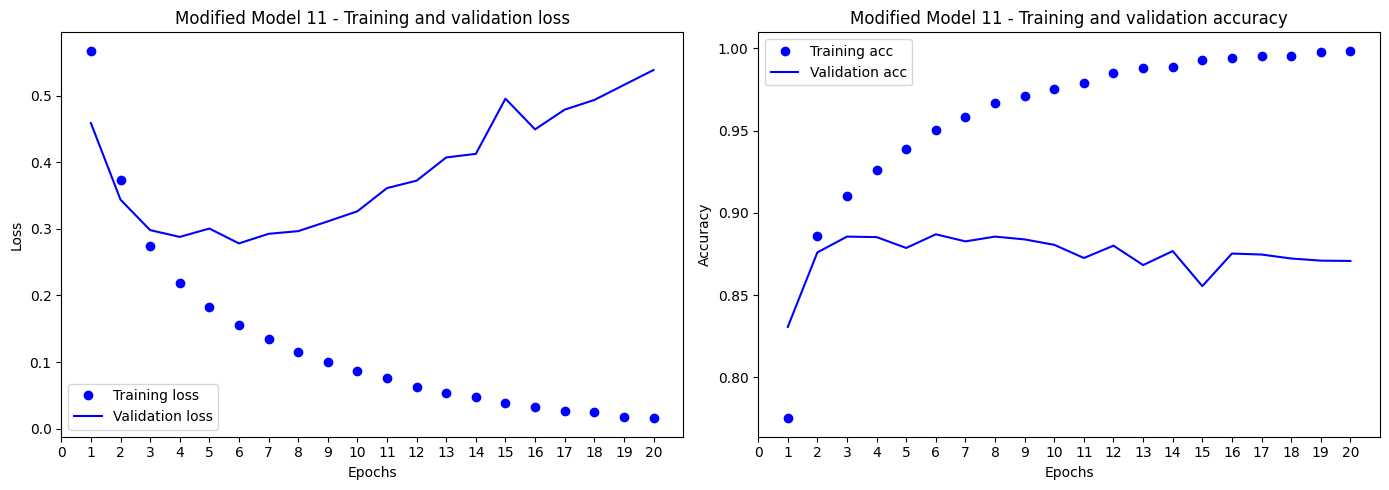

In [337]:
# Plot
modified_model_11_history_dict = modified_model_11_history.history
modified_model_11_loss_values = modified_model_11_history_dict["loss"]
modified_model_11_val_loss_values = modified_model_11_history_dict["val_loss"]
modified_model_11_epochs = range(1, len(modified_model_11_loss_values) + 1)
modified_model_11_acc = modified_model_11_history_dict["accuracy"]
modified_model_11_val_acc = modified_model_11_history_dict["val_accuracy"]

# Create a figure with 1 row and 2 columns for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot for Loss
ax1.plot(modified_model_11_epochs, modified_model_11_loss_values, "bo", label="Training loss")
ax1.plot(modified_model_11_epochs, modified_model_11_val_loss_values, "b", label="Validation loss")
ax1.set_title("Modified Model 11 - Training and validation loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_xlim([0, 21])
ax1.set_xticks(range(0, 21, 1))
ax1.legend()

# Plot for Accuracy
ax2.plot(modified_model_11_epochs, modified_model_11_acc, "bo", label="Training acc")
ax2.plot(modified_model_11_epochs, modified_model_11_val_acc, "b", label="Validation acc")
ax2.set_title("Modified Model 11 - Training and validation accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.set_xlim([0, 21])
ax2.set_xticks(range(0, 21, 1))
ax2.legend()

# Show the combined figure
plt.tight_layout()
plt.show()

For the eleventh modified model, the highest accuracy and the smallest loss value is at epoch = 5.\
I will retrain with epoch = 5 then evaluate the model with the test data.

In [339]:
modified_model_R11 = keras.Sequential([
   layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.000001)),
   layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.000001)),
   layers.Dense(1, activation='sigmoid')
])

modified_model_R11.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

modified_model_R11_epoch = 4

modified_model_R11_history = modified_model_R11.fit(partial_x_train, 
                              partial_y_train, 
                              epochs=modified_model_R11_epoch,
                              batch_size=512, 
                              validation_data=(x_val, y_val))

Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.6915 - loss: 0.5933 - val_accuracy: 0.8618 - val_loss: 0.3921
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8971 - loss: 0.3298 - val_accuracy: 0.8565 - val_loss: 0.3520
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9201 - loss: 0.2465 - val_accuracy: 0.8880 - val_loss: 0.2819
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9382 - loss: 0.1946 - val_accuracy: 0.8890 - val_loss: 0.2747


In [340]:
modified_model_R11_results = modified_model_R11.evaluate(x_test, y_test)
print("Retrained Modeified Model 11 - Test Accuracy: ", round(modified_model_R11_results[1],4))
print("Retrained Modifired Model 11 - Test Loss Value: ", round(modified_model_R11_results[0],4))

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8837 - loss: 0.2895
Retrained Modeified Model 11 - Test Accuracy:  0.8842
Retrained Modifired Model 11 - Test Loss Value:  0.2885



#### 7.2. Modified Model 12
- 16 nodes
- 2 hidden layers
- ReLU activation function
- binary_crossentropy loss function
- 2 layers of dropout at 50%

In [305]:
modified_model_12 = keras.Sequential([
   layers.Dense(16, activation='relu'),
   layers.Dropout(0.5),
   layers.Dense(16, activation='relu'),
   layers.Dropout(0.5),
   layers.Dense(1, activation='sigmoid')
])

modified_model_12.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

modified_model_12_history = modified_model_12.fit(partial_x_train, 
                              partial_y_train, 
                              epochs=20,
                              batch_size=512, 
                              validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.5874 - loss: 0.6684 - val_accuracy: 0.8477 - val_loss: 0.5405
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7493 - loss: 0.5481 - val_accuracy: 0.8636 - val_loss: 0.4400
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8044 - loss: 0.4686 - val_accuracy: 0.8724 - val_loss: 0.3805
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8448 - loss: 0.4115 - val_accuracy: 0.8803 - val_loss: 0.3302
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8791 - loss: 0.3531 - val_accuracy: 0.8841 - val_loss: 0.3046
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8934 - loss: 0.3105 - val_accuracy: 0.8890 - val_loss: 0.2889
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9119 - loss: 0.2650 - val_accuracy: 0.8890 - val_loss: 0.2855
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9233 - loss: 0.2429 - val_accuracy: 0.8827 - v

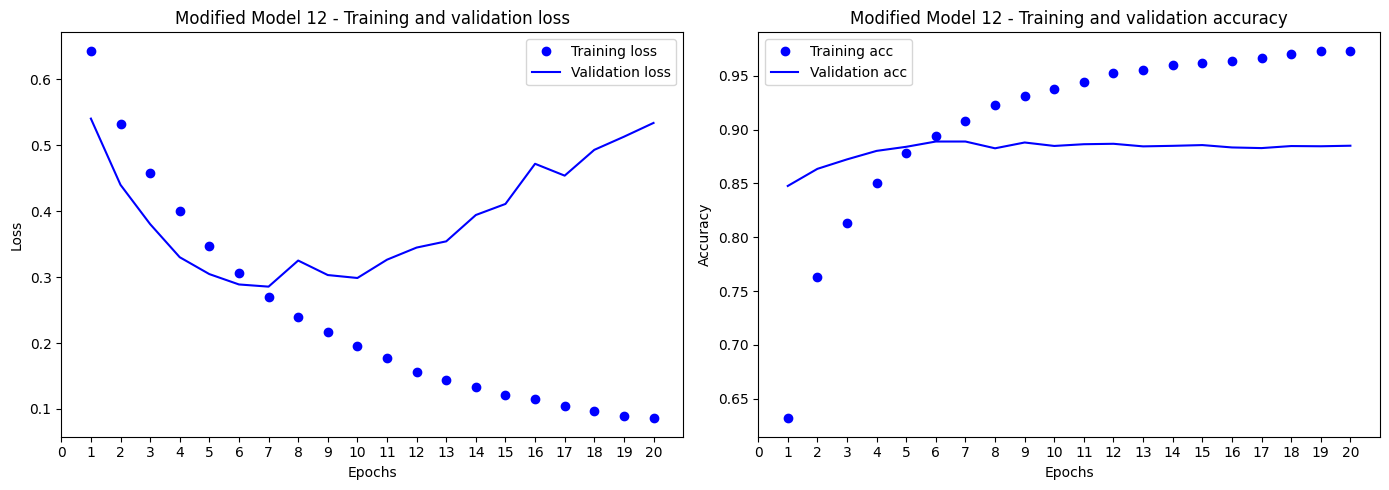

In [306]:
# Plot
modified_model_12_history_dict = modified_model_12_history.history
modified_model_12_loss_values = modified_model_12_history_dict["loss"]
modified_model_12_val_loss_values = modified_model_12_history_dict["val_loss"]
modified_model_12_epochs = range(1, len(modified_model_12_loss_values) + 1)
modified_model_12_acc = modified_model_12_history_dict["accuracy"]
modified_model_12_val_acc = modified_model_12_history_dict["val_accuracy"]

# Create a figure with 1 row and 2 columns for subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot for Loss
ax1.plot(modified_model_12_epochs, modified_model_12_loss_values, "bo", label="Training loss")
ax1.plot(modified_model_12_epochs, modified_model_12_val_loss_values, "b", label="Validation loss")
ax1.set_title("Modified Model 12 - Training and validation loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.set_xlim([0, 21])
ax1.set_xticks(range(0, 21, 1))
ax1.legend()

# Plot for Accuracy
ax2.plot(modified_model_12_epochs, modified_model_12_acc, "bo", label="Training acc")
ax2.plot(modified_model_12_epochs, modified_model_12_val_acc, "b", label="Validation acc")
ax2.set_title("Modified Model 12 - Training and validation accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.set_xlim([0, 21])
ax2.set_xticks(range(0, 21, 1))
ax2.legend()

# Show the combined figure
plt.tight_layout()
plt.show()

For the twelveth modified model, the highest accuracy and the smallest loss value is at epoch = 7.\
I will retrain with epoch = 7 then evaluate the model with the test data.

In [309]:
modified_model_R12 = keras.Sequential([
   layers.Dense(16, activation='relu'),
   layers.Dropout(0.5),
   layers.Dense(16, activation='relu'),
   layers.Dropout(0.5),
   layers.Dense(1, activation='sigmoid')
])

modified_model_R12.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

modified_model_R12_epoch = 7

modified_model_R12_history = modified_model_R12.fit(partial_x_train, 
                              partial_y_train, 
                              epochs=modified_model_R12_epoch,
                              batch_size=512, 
                              validation_data=(x_val, y_val))

Epoch 1/7
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.5909 - loss: 0.6627 - val_accuracy: 0.8415 - val_loss: 0.5072
Epoch 2/7
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7474 - loss: 0.5323 - val_accuracy: 0.8618 - val_loss: 0.4122
Epoch 3/7
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8157 - loss: 0.4456 - val_accuracy: 0.8679 - val_loss: 0.3506
Epoch 4/7
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8479 - loss: 0.3829 - val_accuracy: 0.8851 - val_loss: 0.3031
Epoch 5/7
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8765 - loss: 0.3326 - val_accuracy: 0.8780 - val_loss: 0.2943
Epoch 6/7
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8915 - loss: 0.2924 - val_accuracy: 0.8911 - val_loss: 0.2734
Epoch 7/7
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9104 - loss: 0.2581 - val_accuracy: 0.8873 - val_loss: 0.2733


In [310]:
modified_model_R12_results = modified_model_R12.evaluate(x_test, y_test)
print("Retrained Modeified Model 12 - Test Accuracy: ", round(modified_model_R12_results[1],4))
print("Retrained Modifired Model 12 - Test Loss Value: ", round(modified_model_R12_results[0],4))

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8822 - loss: 0.2875
Retrained Modeified Model 12 - Test Accuracy:  0.8825
Retrained Modifired Model 12 - Test Loss Value:  0.288


### 8. Summary

I developed thirteen models, including a base model, to explore how varying the model configurations would affect the performance metrics. These metrics, namely loss values and accuracy, were closely comparable across all thirteen models. The loss values ranged from 0.28 to 0.35, while accuracy scores varied between 84% and 88%.\
\
First, I observed that increasing the number of hidden layers contributed to greater model complexity. This resulted in fewer training iterations (epochs) being required before the models began overfitting. Similarly, increasing the number of nodes in the hidden layers also reduced the number of epochs needed before overfitting occurred. Both of these factors—more layers and more nodes—essentially made the models more efficient in terms of convergence, but also more prone to overfitting.\
\
When switching the loss function from 'binary_crossentropy' to 'mse', I noticed a slight drop in performance. I advise against using 'mse' for classification problems because its non-convex nature in binary classification makes it less suited for this task.\
\
Forth, I experimented with using the 'tanh' activation function instead of 'ReLU'. While the models with 'tanh' reached the overfitting stage more quickly, those with 'ReLU' performed slightly better in terms of both loss values and accuracy. In the final step of model refinement, I implemented regularization and dropout techniques to improve generalization. I applied L2 regularization with a value of 0.000002, which led to better performance compared to the base model. Furthermore, a two-layer dropout method with a 50% dropout rate significantly reduced model complexity. This configuration resulted in the lowest loss value among all thirteen models, demonstrating the effectiveness of these techniques in reducing overfitting while maintaining strong performance. 

In [359]:
data = {
    'Model': ["Base Model", 
              "Modified Model 1", "Modified Model 2", 
              "Modified Model 3", "Modified Model 4", "Modified Model 5",
              "Modified Model 6",
              "Modified Model 7", "Modified Model 8", "Modified Model 9", "Modified Model 10", 
              "Modified Model 11", "Modified Model 12"],
    'Number of Hidden layers': [2, 
                                1, 3, 
                                2, 2, 2, 
                                2, 
                                2, 2, 2, 2, 
                                2, 2],
    'Number of Nodes in Hidden layers': [16, 
                                         16, 16, 
                                         8, 32, 64,
                                         16, 
                                         8, 16, 32, 64, 
                                         16, 16],
    'Activation function': ["Relu", 
                            "Relu", "Relu", 
                            "Relu", "Relu", "Relu",
                            "Relu",
                            "tanh", "tanh", "tanh", "tanh",
                            "Relu", "Relu"],
    'Loss function': ["binary_crossentropy",
                      "binary_crossentropy", "binary_crossentropy",
                      "binary_crossentropy", "binary_crossentropy", "binary_crossentropy",
                      "mse",
                      "binary_crossentropy", "binary_crossentropy", "binary_crossentropy", "binary_crossentropy",
                      "binary_crossentropy", "binary_crossentropy"],
    'Epochs': [based_model_R1_epoch,
               modified_model_R1_epoch, modified_model_R2_epoch,
               modified_model_R3_epoch, modified_model_R4_epoch, modified_model_R5_epoch,
               modified_model_R6_epoch,
               modified_model_R7_epoch, modified_model_R8_epoch, modified_model_R9_epoch, modified_model_R10_epoch,
               modified_model_R11_epoch, modified_model_R12_epoch],
    'Loss value': [Retrain_model_R1_results[0], 
             modified_model_R1_results[0], modified_model_R2_results[0], 
             modified_model_R3_results[0], modified_model_R4_results[0], modified_model_R5_results[0],
             modified_model_R6_results[0], 
             modified_model_R7_results[0], modified_model_R8_results[0], modified_model_R9_results[0], modified_model_R10_results[0],
             modified_model_R11_results[0], modified_model_R12_results[0]],
    'Accuracy': [Retrain_model_R1_results[1], 
                 modified_model_R1_results[1], modified_model_R2_results[1], 
                 modified_model_R3_results[1], modified_model_R4_results[1], modified_model_R5_results[1],
                 modified_model_R6_results[1], 
                 modified_model_R7_results[1], modified_model_R8_results[1], modified_model_R9_results[1], modified_model_R10_results[1],
                 modified_model_R11_results[1], modified_model_R12_results[1]],
    'Technique':["",
                 "","",
                 "","","",
                 "",
                 "","","","",
                 "Regularization L2 at 0.000001", "Dropout at 50%"]
}

summary_table = pd.DataFrame(data)
summary_table


,Model,Number of Hidden layers,Number of Nodes in Hidden layers,Activation function,Loss function,Epochs,Loss value,Accuracy,Technique
0,Base Model,2,16,Relu,binary_crossentropy,5,0.295277,0.88036,
1,Modified Model 1,1,16,Relu,binary_crossentropy,5,0.296580,0.88044,
2,Modified Model 2,3,16,Relu,binary_crossentropy,3,0.307072,0.88064,
3,Modified Model 3,2,8,Relu,binary_crossentropy,6,0.291259,0.88372,
4,Modified Model 4,2,32,Relu,binary_crossentropy,4,0.289604,0.88320,
5,Modified Model 5,2,64,Relu,binary_crossentropy,3,0.291381,0.88196,
6,Modified Model 6,2,16,Relu,mse,2,0.331524,0.86472,
7,Modified Model 7,2,8,tanh,binary_crossentropy,6,0.293252,0.87936,
8,Modified Model 8,2,16,tanh,binary_crossentropy,4,0.296740,0.87888,
9,Modified Model 9,2,32,tanh,binary_crossentropy,2,0.293387,0.87908,
